In [1]:
%run "Common setup.ipynb"

In [2]:
filtered_corpora_fn = "{}/rest_filtered_corpora.txt".format(TMP_DIR)
RC = mk.RecordCollection(filtered_corpora_fn)

Create figures - top `n` journals by absolute number of publications and the publication trend

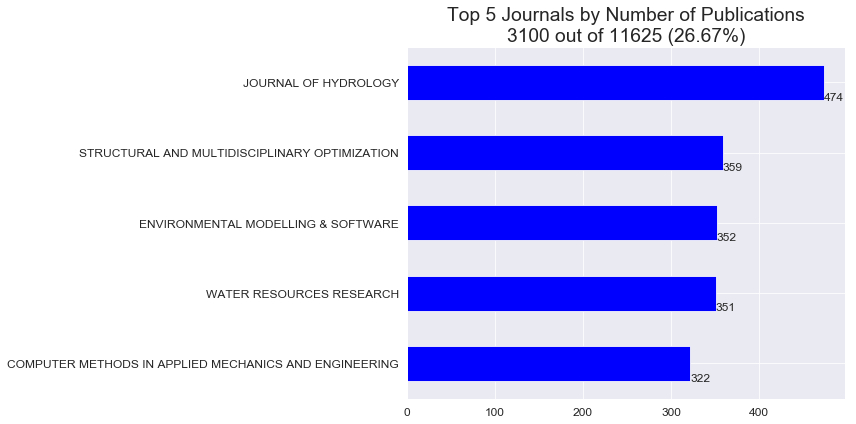

In [3]:
wos_plot.plot_pubs_per_journal(RC, top_n=5, annotate=True, show_stats=True, 
                               save_plot_fn='{}/Figure_5a_top5_by_pubs.png'.format(FIG_DIR))

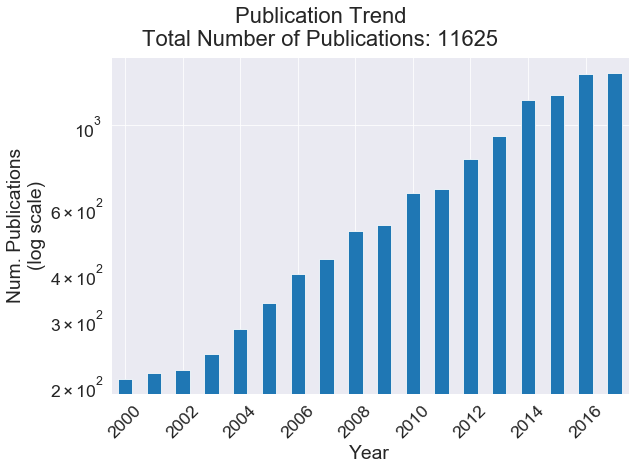

In [4]:
wos_plot.plot_pub_trend(RC, title='Publication Trend', save_plot_fn="{}/Figure_5b_overall_pub_trend.png".format(FIG_DIR))

In [5]:
# wos_plot.plot_kw_trend(RC, title='Keyword and Publication Trend')

<hr>

Identifying the top journals and papers by publication and citation

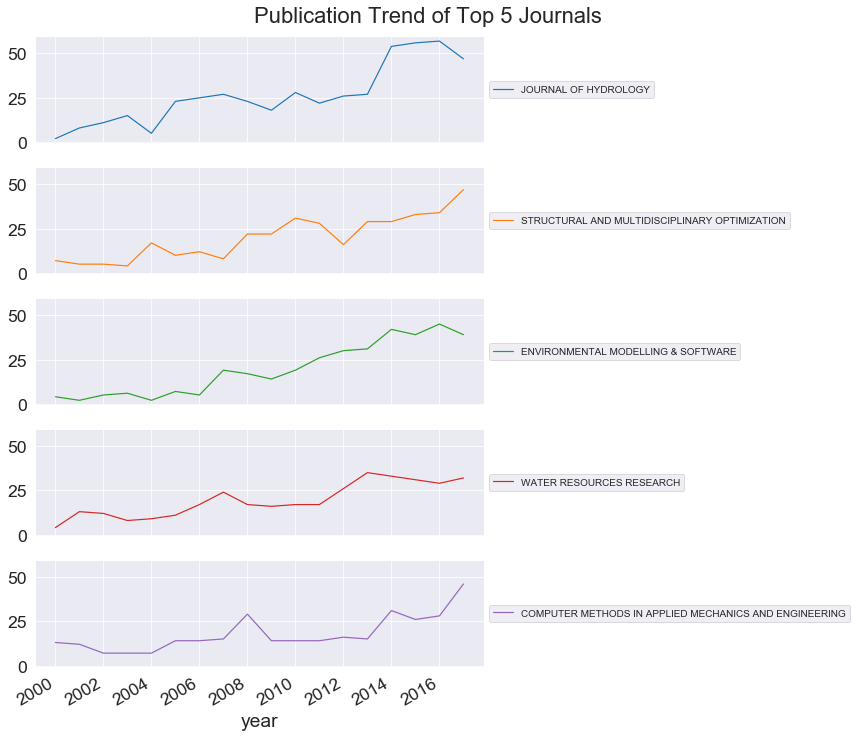

In [6]:
wos_plot.plot_journal_pub_trend(RC, top_n=5, title='Publication Trend of Top 5 Journals',
                                save_plot_fn='{}/Figure_6_pubtrend_of_top5_journals.png'.format(FIG_DIR))

In [7]:
journals_of_interest = ['Structural and Multidisciplinary Optimization', 
                        'Computer Methods in Applied Mechanics and Engineering',
                        'Water Resources Research', 
                        'Environmental Modelling & Software', 
                        'Journal of Hydrology']

journals_of_interest = list(map(str.upper, journals_of_interest))
pubs_for_journals = wosis.find_pubs_by_journal(RC, journals_of_interest)

Interested in seeing the citations for papers in the identified top journals

In [8]:
# Get citations for each paper
paper_citations_per_journal = {}
for pubs in pubs_for_journals:
    fn = '{}/journal_pub_citations_{}.csv'.format(TMP_DIR, pubs)
    paper_citations_per_journal[pubs] = wosis.get_num_citations(pubs_for_journals[pubs], 
                                                                    WOS_CONFIG,
                                                                    cache_as=fn)

In [9]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection = pd.DataFrame(columns=cols_of_interest)
for journal, df in paper_citations_per_journal.items():
    df = wosis.link_to_pub(df)
    df['journal'] = df['SO']
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection = collection.append(df[cols_of_interest], ignore_index=True)
    
collection.AU = collection.AU.str.replace("|", " | ")

Table 1 for paper

In [10]:
top_cited_in_top_journals = collection.sort_values('citations', ascending=False)

top_cited_in_top_journals.head(10)

AU  year  \
1149  Bennett, ND | Croke, BFW | Guariso, G | Guilla...  2013   
1150          Campolongo, F | Cariboni, J | Saltelli, A  2007   
352   Abbaspour, KC | Yang, J | Maximov, I | Siber, ...  2007   
353   van Griensven, A | Meixner, T | Grunwald, S | ...  2006   
1151  Refsgaard, JC | van der Sluijs, JP | Hojberg, ...  2007   
1152            Merritt, WS | Letcher, RA | Jakeman, AJ  2003   
1505                              Sigmund, O | Maute, K  2013   
1153                            Saltelli, A | Annoni, P  2010   
354   Oudin, L | Hervieu, F | Michel, C | Perrin, C ...  2005   
355   Yang, J | Reichert, P | Abbaspour, KC | Xia, J...  2008   

                                                  title  \
1149  Characterising performance of environmental mo...   
1150  An effective screening design for sensitivity ...   
352   Modelling hydrology and water quality in the p...   
353   A global sensitivity analysis tool for the par...   
1151  Uncertainty in the environmental modelling pro...   
1152  A review of erosion and sediment transport models   
1505  Topology optimization approaches A comparative...   
1153    How to avoid a perfunctory sensitivity analysis   
354   Which potential evapotranspiration input for a...   
355   Comparing uncertainty analysis techniques for ...   

                                            journal citations  \
1149             ENVIRONMENTAL MODELLING & SOFTWARE       595   
1150             ENVIRONMENTAL MODELLING & SOFTWARE       589   
352                            JOURNAL OF HYDROLOGY       575   
353                            JOURNAL OF HYDROLOGY       562   
1151             ENVIRONMENTAL MODELLING & SOFTWARE       517   
1152             ENVIRONMENTAL MODELLING & SOFTWARE       416   
1505  STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION       405   
1153             ENVIRONMENTAL MODELLING & SOFTWARE       360   
354                            JOURNAL OF HYDROLOGY       331   
355                            JOURNAL OF HYDROLOGY       316   

                                              DOI link  
1149  https://dx.doi.org/10.1016/j.envsoft.2012.09.011  
1150  https://dx.doi.org/10.1016/j.envsoft.2006.10.004  
352   https://dx.doi.org/10.1016/j.jhydrol.2006.09.014  
353   https://dx.doi.org/10.1016/j.jhydrol.2005.09.008  
1151  https://dx.doi.org/10.1016/j.envsoft.2007.02.004  
1152  https://dx.doi.org/10.1016/S1364-8152(03)00078-1  
1505      https://dx.doi.org/10.1007/s00158-013-0978-6  
1153  https://dx.doi.org/10.1016/j.envsoft.2010.04.012  
354   https://dx.doi.org/10.1016/j.jhydrol.2004.08.026  
355   https://dx.doi.org/10.1016/j.jhydrol.2008.05.012

Because absolute citations bias towards older papers, we take a look at average citations

In [11]:
for citation_data_key in paper_citations_per_journal:
    cite_data = paper_citations_per_journal[citation_data_key]
    paper_citations_per_journal[citation_data_key] = wosis.calc_average_citations(cite_data, max_year=2017)

In [12]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'Avg. Citations', 'DOI link']
collection = pd.DataFrame(columns=cols_of_interest)
for journal, df in paper_citations_per_journal.items():
    df = wosis.link_to_pub(df)
    df['journal'] = df['SO']
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('Avg. Citations', ascending=False)
    collection = collection.append(df[cols_of_interest], ignore_index=True)

collection.AU = collection.AU.str.replace("|", " | ")

In [13]:
top_avg_cite_in_top_journals = collection.sort_values('Avg. Citations', ascending=False)

In [14]:
top_avg_cite_in_top_journals.head(10)

AU  year  \
1149  Bennett, ND | Croke, BFW | Guariso, G | Guilla...  2013   
1505                              Sigmund, O | Maute, K  2013   
352   Abbaspour, KC | Rouholahnejad, E | Vaghefi, S ...  2015   
1150  Pianosi, F | Beven, K | Freer, J | Hall, JW | ...  2016   
1151  Teng, J | Jakeman, AJ | Vaze, J | Croke, BFW |...  2017   
1152          Campolongo, F | Cariboni, J | Saltelli, A  2007   
353   Abbaspour, KC | Yang, J | Maximov, I | Siber, ...  2007   
1153  Refsgaard, JC | van der Sluijs, JP | Hojberg, ...  2007   
354   van Griensven, A | Meixner, T | Grunwald, S | ...  2006   
1154                            Saltelli, A | Annoni, P  2010   

                                                  title  \
1149  Characterising performance of environmental mo...   
1505  Topology optimization approaches A comparative...   
352   A continental-scale hydrology and water qualit...   
1150  Sensitivity analysis of environmental models: ...   
1151  Flood inundation modelling: A review of method...   
1152  An effective screening design for sensitivity ...   
353   Modelling hydrology and water quality in the p...   
1153  Uncertainty in the environmental modelling pro...   
354   A global sensitivity analysis tool for the par...   
1154    How to avoid a perfunctory sensitivity analysis   

                                            journal citations  Avg. Citations  \
1149             ENVIRONMENTAL MODELLING & SOFTWARE       595          119.00   
1505  STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION       405           81.00   
352                            JOURNAL OF HYDROLOGY       212           70.67   
1150             ENVIRONMENTAL MODELLING & SOFTWARE       138           69.00   
1151             ENVIRONMENTAL MODELLING & SOFTWARE        61           61.00   
1152             ENVIRONMENTAL MODELLING & SOFTWARE       589           53.55   
353                            JOURNAL OF HYDROLOGY       575           52.27   
1153             ENVIRONMENTAL MODELLING & SOFTWARE       517           47.00   
354                            JOURNAL OF HYDROLOGY       562           46.83   
1154             ENVIRONMENTAL MODELLING & SOFTWARE       360           45.00   

                                              DOI link  
1149  https://dx.doi.org/10.1016/j.envsoft.2012.09.011  
1505      https://dx.doi.org/10.1007/s00158-013-0978-6  
352   https://dx.doi.org/10.1016/j.jhydrol.2015.03.027  
1150  https://dx.doi.org/10.1016/j.envsoft.2016.02.008  
1151  https://dx.doi.org/10.1016/j.envsoft.2017.01.006  
1152  https://dx.doi.org/10.1016/j.envsoft.2006.10.004  
353   https://dx.doi.org/10.1016/j.jhydrol.2006.09.014  
1153  https://dx.doi.org/10.1016/j.envsoft.2007.02.004  
354   https://dx.doi.org/10.1016/j.jhydrol.2005.09.008  
1154  https://dx.doi.org/10.1016/j.envsoft.2010.04.012

In [15]:
top_cited_in_top_journals.to_csv('{}/top_cited_in_top_journals_2000-2017.csv'.format(DATA_DIR), index=False)

In [16]:
top_avg_cite_in_top_journals.to_csv('{}/top_avg_cited_in_top_journals_2000-2017.csv'.format(DATA_DIR), index=False)